# Working with Data

In this session we will use mostly Pandas, a powerful open-source Python library used for data manipulation, analysis, and cleaning. It provides flexible data structures like:
- DataFrame (like a spreadsheet or Stata dataset)
- Series (like a single column or variable)

Pandas makes handling data easier:
- Easy to load data from CSV, Excel, SQL, etc.
- Simple syntax for filtering, grouping, aggregating, and transforming data.
- Excellent for handling missing values, merging datasets, and doing descriptive stats.
- Comparable to what you might do in Stata, R, or Excel, but in a programmable and reusable way

We will be using a randomized dataset that contains hypothetical transaction data in the dairy industry for 4 competitors, where 2 of them will be merging.

### Key features of Dataframe

- Label-based indexing (Meaning you access rows or columns by their names (labels) rather than by their position)
- Column-wise and row-wise operations
- Support for mixed data types
- Fast, vectorized operations

In [2]:
# we'll mostly need pandas and numpy to work with tabulated data
import pandas as pd
import numpy as np

df = pd.read_csv(r"\\cet.comp.cec.eu.int\compedmacompcet\CET\python_training\Python_CET_Crash_Course\input\transaction_data_milk_v2.csv")

print("Sample transaction data:")
df.head()

Sample transaction data:


,transaction_id,date,company,customer_id,volume_kg,price_per_kg,cost_per_kg,product,region
0,0,2024-04-12,Milkand,1664,149,1.25,0.74,Dairy,South
1,1,2024-12-14,Milkand,1089,2873,1.23,0.83,Dairy,West
2,2,2024-09-27,Milkand,1615,2015,1.37,0.68,Dairy,West
3,3,2024-04-16,Milkand,1947,2536,1.35,0.71,Dairy,North
4,4,2024-03-12,Milkand,1523,1904,1.23,0.78,Dairy,East


Let's explore it a bit. We can get quick info from the columns and the data


In [179]:
# describe provides descriptive statistics of the numeric columns
df.describe()

,transaction_id,customer_id,volume_kg,price_per_kg,cost_per_kg
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,9999.500000,1501.267450,1547.747900,1.211845,0.732477
std,5773.647028,288.403165,838.325657,0.115862,0.075754
min,0.000000,1000.000000,100.000000,0.800000,0.460000
25%,4999.750000,1254.000000,819.000000,1.130000,0.680000
50%,9999.500000,1502.500000,1554.000000,1.220000,0.740000
75%,14999.250000,1749.000000,2274.000000,1.300000,0.790000
max,19999.000000,1999.000000,2999.000000,1.590000,0.990000


In [180]:
# Print a concise summary of a DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  20000 non-null  int64  
 1   date            20000 non-null  object 
 2   company         20000 non-null  object 
 3   customer_id     20000 non-null  int64  
 4   volume_kg       20000 non-null  int64  
 5   price_per_kg    20000 non-null  float64
 6   cost_per_kg     20000 non-null  float64
 7   product         20000 non-null  object 
 8   region          20000 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 1.4+ MB


In [27]:
# print the name of the columns, in a list
df.columns

Index(['transaction_id', 'date', 'company', 'customer_id', 'volume_kg',
       'price_per_kg', 'cost_per_kg', 'product', 'region', 'revenue'],
      dtype='object')

In [28]:
df.index

RangeIndex(start=0, stop=20000, step=1)

In [182]:
# do we have missing data? This is summing all True/False per column (equivalent of 1/0)
df.isna().sum()

transaction_id    0
date              0
company           0
customer_id       0
volume_kg         0
price_per_kg      0
cost_per_kg       0
product           0
region            0
dtype: int64

We can create new columns with simple operations across columns.

In [3]:
df["revenue"] = df["volume_kg"] * df["price_per_kg"]

We can select data, and save it into a different object (often a new dataframe). Here we use the .loc[] accessor, and it's the best way to select data in Pandas. It basically return the data at the locations where [row condition], give [column(s)].

df.loc[ROWS_SELECTION, COLUMNS_SELECTION]

For more basic selection (a simple column), we can use square brackets --> df['company'] would give us the column "company". Compare Option 1 and 2 below. Is it the same?

In [4]:
# Option 1
milkand = df.loc[df.company=='Milkand']
milkand.head()

,transaction_id,date,company,customer_id,volume_kg,price_per_kg,cost_per_kg,product,region,revenue
0,0,2024-04-12,Milkand,1664,149,1.25,0.74,Dairy,South,186.25
1,1,2024-12-14,Milkand,1089,2873,1.23,0.83,Dairy,West,3533.79
2,2,2024-09-27,Milkand,1615,2015,1.37,0.68,Dairy,West,2760.55
3,3,2024-04-16,Milkand,1947,2536,1.35,0.71,Dairy,North,3423.60
4,4,2024-03-12,Milkand,1523,1904,1.23,0.78,Dairy,East,2341.92


In [5]:
# Option 2
milkand = df[df.company=="Milkand"]
milkand.head()

,transaction_id,date,company,customer_id,volume_kg,price_per_kg,cost_per_kg,product,region,revenue
0,0,2024-04-12,Milkand,1664,149,1.25,0.74,Dairy,South,186.25
1,1,2024-12-14,Milkand,1089,2873,1.23,0.83,Dairy,West,3533.79
2,2,2024-09-27,Milkand,1615,2015,1.37,0.68,Dairy,West,2760.55
3,3,2024-04-16,Milkand,1947,2536,1.35,0.71,Dairy,North,3423.60
4,4,2024-03-12,Milkand,1523,1904,1.23,0.78,Dairy,East,2341.92


I recommend getting used to using .loc[] accessor, as it allows for much more complex data selection. For instance:

In [6]:
# what are the high value transactions of the Acquirer?
high_value_milkand = df.loc[(df['company'] == 'Milkand') & (df['revenue'] > df['revenue'].median()), ['customer_id', 'revenue', 'date']]

high_value_milkand.head()

,customer_id,revenue,date
1,1089,3533.79,2024-12-14
2,1615,2760.55,2024-09-27
3,1947,3423.60,2024-04-16
4,1523,2341.92,2024-03-12
5,1159,2122.80,2024-07-07


#### Exercise 1: Restrcit the data for only the two merging firms (Milkand and Orla)

In [17]:
# inspect the name of all competitors with .unique() or .drop_duplicates()


# Select only the merging Parties



#### Exercise 2: create two new columns with total cost and total profit per transaction and print the head

In [30]:
# add your code here



#### Exercise 3: Restrict the data for only transactions of Orla with greater than 2998 kg and print the head

In [53]:
# add your code here



We can aggregate data in the form we usually do with "collapse" in Stata.

In [189]:
print("Total revenue per company:")
print(df.groupby('company')['revenue'].sum().sort_values(ascending=False))

Total revenue per company:
company
Milkand     12390954.49
Orla        11274735.53
KMD          8159865.84
Campanya     5684254.01
Name: revenue, dtype: float64


In [190]:
print("Total volume sold per company:")
df.groupby('company')['volume_kg'].sum().sort_values(ascending=False)

Total volume sold per company:


company
Milkand     9916967
Orla        8662479
KMD         7427409
Campanya    4948103
Name: volume_kg, dtype: int64

Now we'll do together a usual workflow in the merger economic assessment. That is:
- Calculate market shares and HHI
- Compute margins (usually given) and Guppis
- Sneak peak visuals

### Market shares

Most of the times, we'll need to calculate market shares... and report them in a formatted way in a Decision, "Word-ready". This is something is relatively easy to do in Python, and most consulstancy firms resort to. We will see how to format numbers but there are many examples out there to format tables in a professional way, which we won't see here.

In [9]:
# Total volume and revenue per firm
agg = df.groupby('company', as_index = False)[['volume_kg','revenue']].sum()

# Compute market shares
agg['volume_market_share'] = agg['volume_kg'] / agg['volume_kg'].sum()
agg['revenue_market_share'] = agg['revenue'] / agg['revenue'].sum()

print(agg)

    company  volume_kg      revenue  volume_market_share  revenue_market_share
0  Campanya    4948103   5684254.01             0.159848              0.151540
1       KMD    7427409   8159865.84             0.239942              0.217540
2   Milkand    9916967  12390954.49             0.320368              0.330339
3      Orla    8662479  11274735.53             0.279841              0.300581


To make quick operations that would require a function but aren't complex enough to define a big customized function, we can use **lambda**. This allows us to run quick functions, and together with **.apply()**, we can apply a function to each object in the dataframe.

Think of **lambda** as your quick kitchen tool and **.apply()** as your kitchen assistant:

    .apply() is like saying: "Hey assistant, go through each ingredient and do this specific task with it.

    lambda is the quick instruction: "For each ingredient (let's call it 'x'), chop it into small pieces" or "For each price, format it as a percentage."

Together, they let you give quick, one-time instructions without writing a formal recipe (full function). For instance:
   
    do this operation to each element in this column --> df['column'].apply(operation)

    lambda creates a temporary, one-time function --> lambda x: x * 2  # "Take x, return x times 2"

Equivalent to writing:
def double(x):
    return x * 2
    
But much quicker for simple tasks!

In [10]:
# Format as % using lambda.
agg_formatted = agg.copy()
agg_formatted['volume_market_share'] = agg_formatted['volume_market_share'].apply(lambda x: f"{x:.1%}")
agg_formatted['revenue_market_share'] = agg_formatted['revenue_market_share'].apply(lambda x: f"{x:.1%}")

print("Market Share Summary:")
print(agg_formatted)

Market Share Summary:
    company  volume_kg      revenue volume_market_share revenue_market_share
0  Campanya    4948103   5684254.01               16.0%                15.2%
1       KMD    7427409   8159865.84               24.0%                21.8%
2   Milkand    9916967  12390954.49               32.0%                33.0%
3      Orla    8662479  11274735.53               28.0%                30.1%


#### Exercise 4: Calculate pre HHI and add it to the agg dataframe as column

In [12]:
# add here your code



Now we calculate together the Delta and post HHI

In [13]:
shares = agg.set_index("company")["revenue_market_share"]

shares_post = pd.Series({
    "Campanya": shares["Campanya"],
    "KMD": shares["KMD"],
    "Milkand+Orla": shares["Milkand"] + shares["Orla"]
})

# Post-merger HHI 
hhi_post = (shares_post * 100).pow(2).sum()

# Delta HHI
delta_hhi = hhi_post - hhi_pre

# assign it to a column
agg['delta_HHI'] = delta_hhi
agg['post_HHI'] = hhi_post

# print it
agg

,company,volume_kg,revenue,volume_market_share,revenue_market_share,pre_HHI,delta_HHI,post_HHI
0,Campanya,4948103,5684254.01,0.159848,0.151540,2697.6076,1985.872654,4683.480254
1,KMD,7427409,8159865.84,0.239942,0.217540,2697.6076,1985.872654,4683.480254
2,Milkand,9916967,12390954.49,0.320368,0.330339,2697.6076,1985.872654,4683.480254
3,Orla,8662479,11274735.53,0.279841,0.300581,2697.6076,1985.872654,4683.480254


#### Margins and Guppis

In [14]:
# we create another df grouping by revenue and cost
df1 = df.groupby("company")[["price_per_kg","cost_per_kg",'revenue']].sum()

# margin ratio (profitability relative to revenue)
df1["margin"] = (df1["price_per_kg"] - df1["cost_per_kg"]) / df1["price_per_kg"]

df1

,price_per_kg,cost_per_kg,revenue,margin
company,,,,
Campanya,3680.64,2237.35,5684254.01,0.392130
KMD,5274.05,3123.37,8159865.84,0.407785
Milkand,7995.14,4803.74,12390954.49,0.399167
Orla,7287.08,4485.08,11274735.53,0.384516


In [23]:
# we isolate the shares per player so that then we calculate DR from it
shares = df1["revenue"] / df1["revenue"].sum()

# we create an empty dataframe to fill then the DR in a loop
diversion_matrix = pd.DataFrame(index=shares.index, columns=shares.index, dtype=float)

print(diversion_matrix)
print(shares)


company   Campanya  KMD  Milkand  Orla
company                               
Campanya       NaN  NaN      NaN   NaN
KMD            NaN  NaN      NaN   NaN
Milkand        NaN  NaN      NaN   NaN
Orla           NaN  NaN      NaN   NaN
company
Campanya    0.151540
KMD         0.217540
Milkand     0.330339
Orla        0.300581
Name: revenue, dtype: float64


In [21]:
# we loop to fill the empty dataframe
for i in shares.index:
    rivals = shares.drop(i)
    diversion_matrix.loc[i] = rivals / rivals.sum()

diversion_matrix

company,Campanya,KMD,Milkand,Orla
company,,,,
Campanya,NaN,0.256394,0.389340,0.354267
KMD,0.193672,NaN,0.422180,0.384148
Milkand,0.226294,0.324850,NaN,0.448855
Orla,0.216666,0.311029,0.472305,NaN


In [204]:
guppi_matrix = pd.DataFrame(index=shares.index, columns=shares.index, dtype=float)

In [209]:
for i in shares.index:
    ''' How much firm i could profitably raise prices if it merged with j, 
    weighted by j’s margin and the diversion between them'''
    
    for j in shares.index:
        if i != j:
            guppi_matrix.loc[i, j] = diversion_matrix.loc[i, j] * df1.loc[j, "margin"]
        else:
            guppi_matrix.loc[i, j] = np.nan

guppi_matrix = guppi_matrix * 100  # convert to %

guppi_matrix

company,Campanya,KMD,Milkand,Orla
company,,,,
Campanya,NaN,10.455350,15.541178,13.622128
KMD,7.594452,NaN,16.852047,14.771129
Milkand,8.873683,13.246914,NaN,17.259218
Orla,8.496136,12.683300,18.852877,NaN


We will see more types of plots with matplotlib and seaborn in the 3rd session, but for matrix type data as this, heatmaps come in handy no? We can then quickly see that the worst possible Guppi is the one that results from the merging Parties.

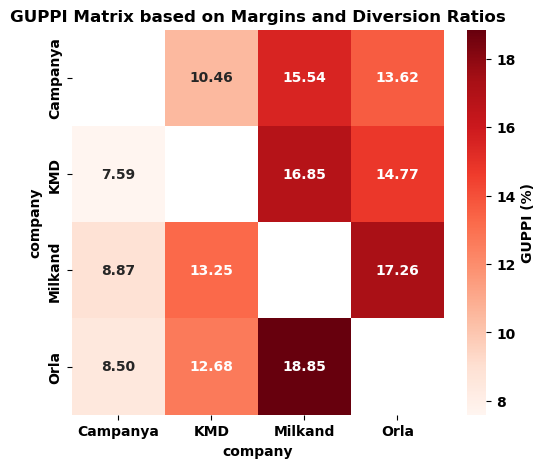

In [210]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,5))
sns.heatmap(guppi_matrix, annot=True, fmt=".2f", cmap="Reds", cbar_kws={'label': 'GUPPI (%)'})
plt.title("GUPPI Matrix based on Margins and Diversion Ratios")
plt.show()

With Pandas we can also plot some basic maps in a built-in way. They are handy because they don't require a lot of coding, but they are mostly basic.

In [214]:
# We will not cover this here, but having datetime information (time series) allows us to do many types of aggregations, such as 
# monthly revenue per company
df['date'] = pd.to_datetime(df['date'])
df_time = df.set_index('date')

# Monthly revenue per company using resample to aggregate at month level
monthly_revenue = df_time.groupby('company').resample('M')['revenue'].sum().unstack('company').fillna(0)

print("Monthly revenue by company:")
monthly_revenue.tail()


Monthly revenue by company:


company,Campanya,KMD,Milkand,Orla
date,,,,
2024-08-31,518501.03,696443.27,1069266.67,874406.00
2024-09-30,428871.28,672773.60,978533.68,978374.61
2024-10-31,468807.30,705440.22,1020516.13,913239.51
2024-11-30,461725.81,709725.87,979019.62,981369.43
2024-12-31,436919.16,658087.76,1113079.28,970719.38


<Axes: title={'center': 'Monthly Revenue by Company (2024)'}, xlabel='date'>

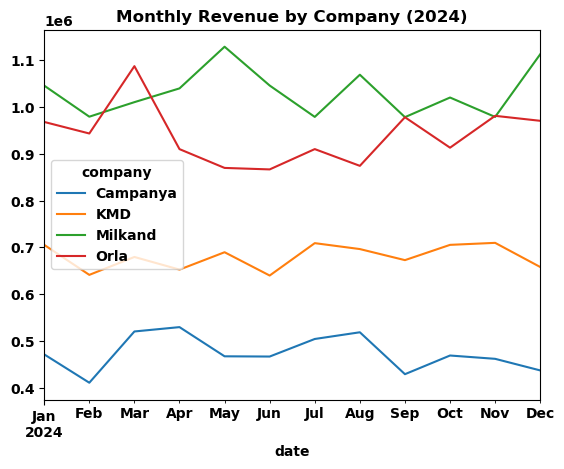

In [213]:
# quick graph with no aesthetics (for aesthetics we need matplotlib)
monthly_revenue.plot(kind='line', title='Monthly Revenue by Company (2024)')